Chapter 7
# 移动窗口
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader 
import scipy.stats as stats
import pylab

In [2]:
df_price = pandas_datareader.data.DataReader(['sp500'], 
                                       data_source='fred', 
                                       start='08-01-2018', end='08-01-2021')
df_price = df_price.dropna()
df_price.to_csv('sp500.csv')
df_price.to_pickle('sp500.pkl')
#%% Rolling max, min

df_max_100 = df_price.rolling(100).max()
df_min_100 = df_price.rolling(100).min()

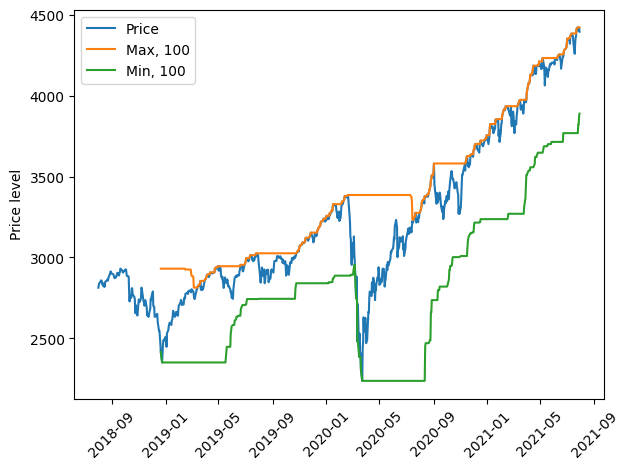

In [3]:
fig, ax = plt.subplots()
# sp500 price
ax.plot(df_price['sp500'], label = 'Price')
ax.plot(df_max_100, label = 'Max, 100')
ax.plot(df_min_100, label = 'Min, 100')

plt.ylabel('Price level')
plt.legend(loc='upper left')
plt.xticks(rotation = 45) 
# Rotates X-Axis Ticks by 45-degrees
fig.tight_layout()

#%% Rolling mean

In [4]:
df_mean_50 = df_price.rolling(50).mean()
df_mean_100 = df_price.rolling(100).mean()
df_mean_250 = df_price.rolling(250).mean()

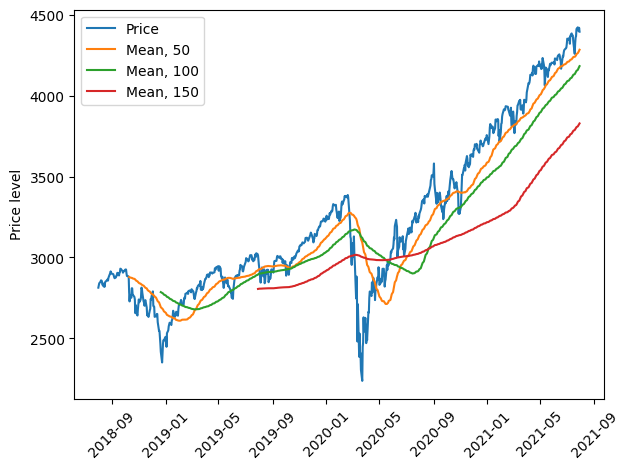

In [5]:
fig, ax = plt.subplots()
# sp500 price
ax.plot(df_price['sp500'], label = 'Price')
ax.plot(df_mean_50, label = 'Mean, 50')
ax.plot(df_mean_100,label = 'Mean, 100')
ax.plot(df_mean_250,label = 'Mean, 150')

plt.ylabel('Price level')
plt.legend(loc='upper left')
plt.xticks(rotation = 45) 
# Rotates X-Axis Ticks by 45-degrees
fig.tight_layout()

In [6]:
#%% daily log return

daily_log_r = df_price.apply(lambda x: np.log(x) - np.log(x.shift(1)))

daily_log_r = daily_log_r.dropna()

#%% Rolling mean, skew, kurtosis on returns 

daily_log_r_mean = daily_log_r.rolling(50).mean()
daily_log_r_std = daily_log_r.rolling(50).std()
daily_log_r_skew = daily_log_r.rolling(50).skew()
daily_log_r_kurt = daily_log_r.rolling(50).kurt()

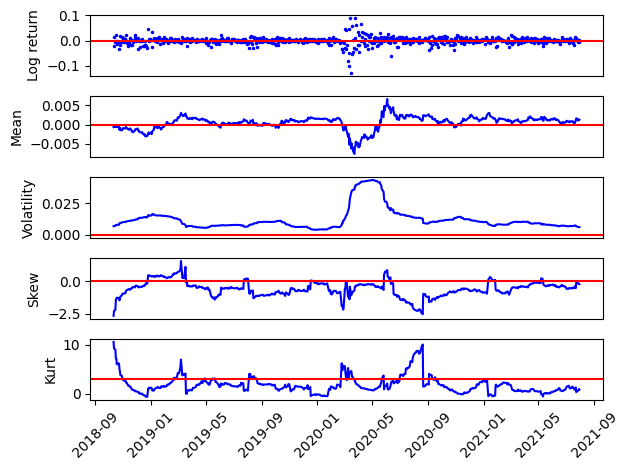

In [7]:
fig, axes = plt.subplots(5,1)

# plot daily log returns
axes[0].plot(daily_log_r[daily_log_r_mean.first_valid_index():daily_log_r_mean.index[-1]],
             marker='.', markersize = 3, 
             color = 'b',linestyle='None',
             label = 'Daily log r')
axes[0].axhline(y = 0, color='r', linestyle='-')
axes[0].set_ylabel ('Log return')
axes[0].set_xticks([])

# plot first moment, mean
axes[1].plot(daily_log_r_mean,label = 'Mean', color = 'b')
axes[1].axhline(y = 0, color='r', linestyle='-')
axes[1].set_ylabel ('Mean')
axes[1].set_xticks([])

# plot second moment, std
axes[2].plot(daily_log_r_std,label = 'Std', color = 'b')
axes[2].axhline(y = 0, color='r', linestyle='-')
axes[2].set_ylabel ('Volatility')
axes[2].set_xticks([])

# plot third moment, skew
axes[3].plot(daily_log_r_skew,label = 'Skew', color = 'b')
axes[3].axhline(y = 0, color='r', linestyle='-')
axes[3].set_ylabel ('Skew')
axes[3].set_xticks([])

# plot fourth moment, kurtosis
axes[4].plot(daily_log_r_kurt,label = 'Kurtosis', color = 'b')
axes[4].set_ylabel ('Kurt')
axes[4].axhline(y = 3, color='r', linestyle='-')

plt.xticks(rotation = 45) 
# Rotates X-Axis Ticks by 45-degrees
fig.tight_layout()

In [8]:
#%% Moving quantile

alpha_95 = 0.95

df_95_percent = daily_log_r.rolling(100).quantile(alpha_95)
df_05_percent = daily_log_r.rolling(100).quantile(1 - alpha_95)

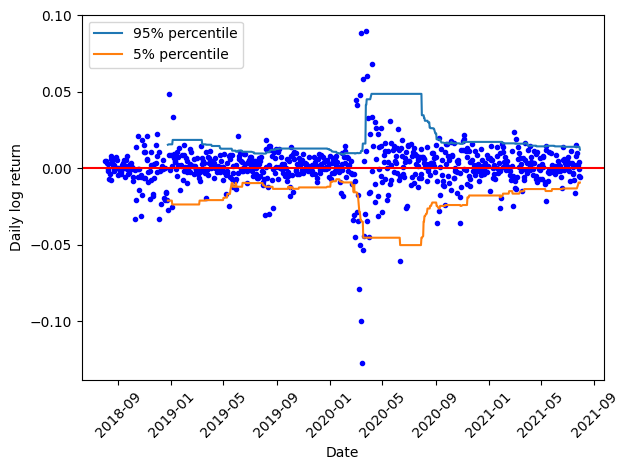

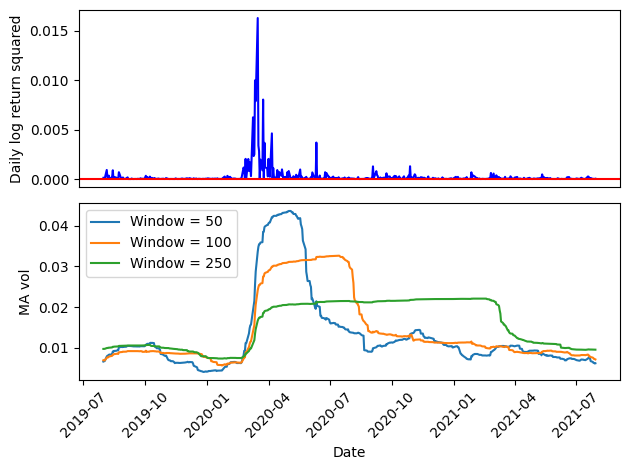

In [9]:
fig, ax = plt.subplots()
ax.plot(daily_log_r,marker='.', color = 'b',linestyle='None')
ax.plot(df_95_percent,label = '95% percentile')
ax.plot(df_05_percent,label = '5% percentile')

plt.axhline(y=0, color='r', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Daily log return')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
fig.tight_layout() 
plt.legend(loc='upper left')

#%% Moving average volatility

MA_vol_50  = daily_log_r.rolling(50).std()
MA_vol_100 = daily_log_r.rolling(100).std()
MA_vol_250 = daily_log_r.rolling(250).std()

# plot daily log returns
fig, axes = plt.subplots(2,1)
# sp500 daily log returns
axes[0].plot((daily_log_r**2)[MA_vol_250.first_valid_index():MA_vol_250.index[-1]],
             color = 'b')

axes[0].set_xticks([])
axes[0].axhline(y=0, color='r', linestyle='-')
axes[0].set_ylabel('Daily log return squared')

# Moving average volatility
axes[1].plot(MA_vol_50[MA_vol_250.first_valid_index():MA_vol_250.index[-1]], label = 'Window = 50')
axes[1].plot(MA_vol_100[MA_vol_250.first_valid_index():MA_vol_250.index[-1]],label = 'Window = 100')
axes[1].plot(MA_vol_250[MA_vol_250.first_valid_index():MA_vol_250.index[-1]],label = 'Window = 250')
axes[1].set_xlabel("Date")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
axes[1].set_ylabel("MA vol")
fig.tight_layout() 
plt.legend(loc='upper left')

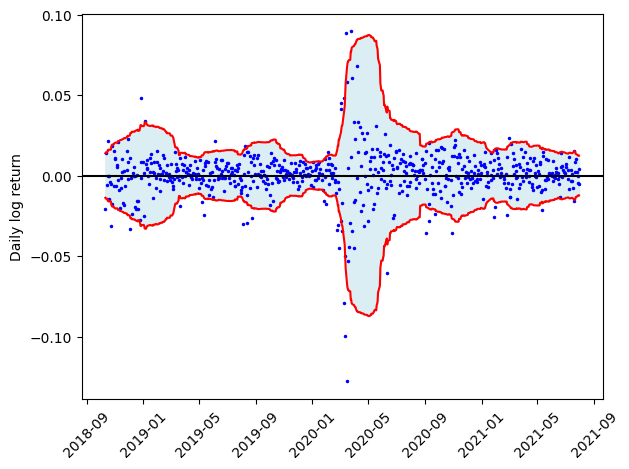

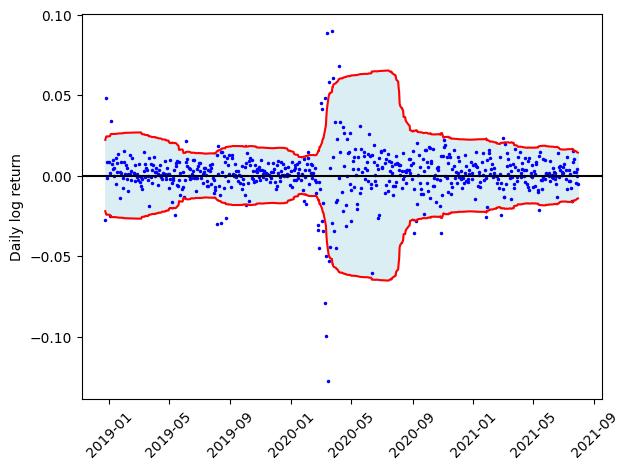

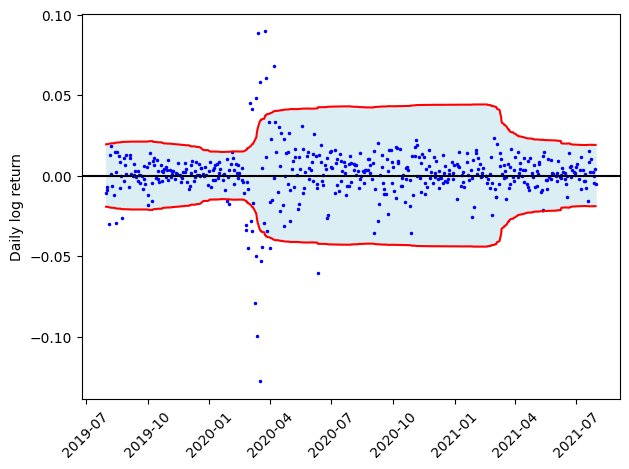

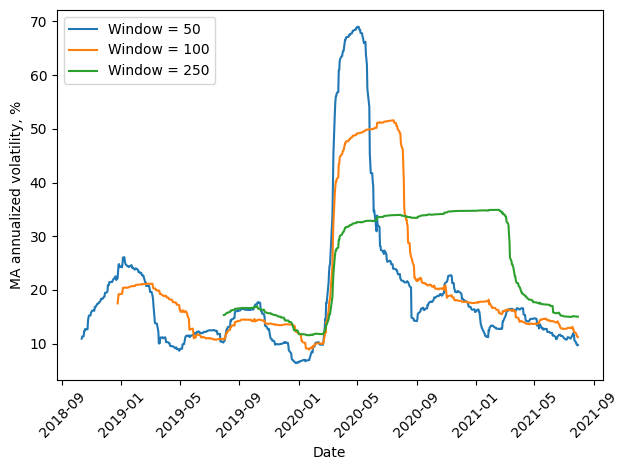

In [10]:
list_df = [MA_vol_50, MA_vol_100, MA_vol_250]

for data in zip(list_df):
    
    data = data[0]
    
    fig, ax = plt.subplots()
    
    # daily return of selected date range
    plt.plot(daily_log_r[data.first_valid_index():data.index[-1]],
                 marker='.', markersize = 3, 
                 color = 'b',linestyle='None')
    
    upper_bound = 2*data[data.first_valid_index():data.index[-1]];
    lower_bound = -upper_bound;
    
    ax.plot(upper_bound, color = 'r')
    ax.plot(lower_bound, color = 'r')
    ax.fill_between(upper_bound.index, upper_bound['sp500'], 
                    lower_bound['sp500'], color = '#DBEEF3')
    ax.axhline(y=0, color='k', linestyle='-')
    
    ax.set_ylabel('Daily log return')
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()

#%% squared root of time

# plot daily log returns
fig, ax = plt.subplots()

# Moving average volatility
ax.plot(MA_vol_50*np.sqrt(250)*100,  label = 'Window = 50')
ax.plot(MA_vol_100*np.sqrt(250)*100, label = 'Window = 100')
ax.plot(MA_vol_250*np.sqrt(250)*100, label = 'Window = 250')
ax.set_xlabel("Date")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax.set_ylabel("MA annualized volatility, %")
fig.tight_layout() 
plt.legend(loc='upper left')